In [ ]:
import matplotlib.image as img
import cv2
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Input,MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.merge import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.datasets import mnist

## Load image


In [ ]:
from google.colab import files
uploaded=files.upload() 

Saving chenglong.jpg to chenglong (1).jpg


**1. Use load_img to load the image chenglong.jpg resize to (224, 224)**

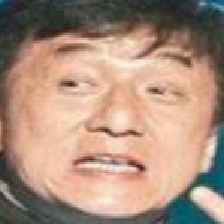

In [ ]:
image = load_img('chenglong.jpg', target_size=(224, 224))
image

**2. Convert the image to array**

In [ ]:
image_arr = img_to_array(image)
image_arr.shape

(224, 224, 3)

## Convolution

**3. Create a kernel matrics**

In [ ]:
### Identity np.matrix([[0,0,0],[0,1,0],[0,0,0]])
### Edge detection [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
kernel=np.matrix([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel

matrix([[-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]])

**4. Load the image using img.imread, then apply filter2D to the image**

In [ ]:
image2=img.imread('chenglong.jpg')
fil=cv2.filter2D(image2, -1, kernel)
fil.shape

(141, 150, 3)

**5. Plot the original image and the filter2D image**

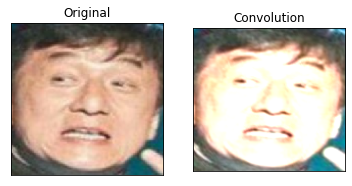

In [ ]:
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(fil),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()

## Layers + Operations

### Activation function

In [ ]:
def tanh(x):
  return 2/(1+ np.exp(-2*x))-1
def sigmoid(x):
  return 1/(1 + np.exp(-x))

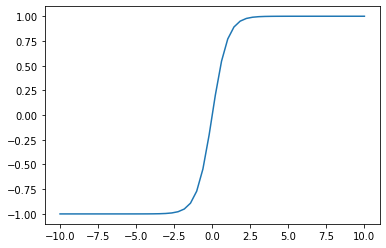

In [ ]:
x=np.linspace(-10,10,50)
plt.plot(x, tanh(x))

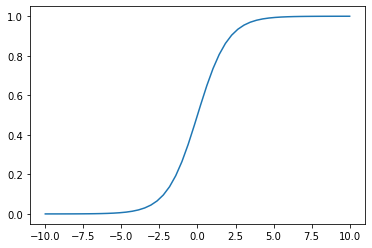

In [ ]:
 plt.plot(x, sigmoid(x))

### Max Pooling

**6. Reshape the image to apply maxpooling**

In [ ]:
image1 = image2.reshape(1,image2.shape[0], image2.shape[1], 3) 
model = Sequential( [MaxPooling2D(pool_size = 3, strides = 2)])  
output = model.predict(image1) 
output = np.squeeze(output) 
output.shape

(70, 74, 3)

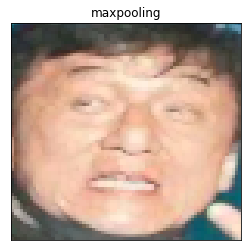

In [ ]:
plt.imshow(output),plt.title('maxpooling')
plt.xticks([]), plt.yticks([])
plt.show()

### Global Pooling

In [ ]:
model = Sequential( [GlobalAveragePooling2D()]) 
output1 = model.predict(image1)  
output1 = np.squeeze(output1) 
output1

array([170, 141, 124], dtype=uint8)

### Flatten

In [ ]:
model.add(Flatten())
output1 = model.predict(image1)  
output1 = np.squeeze(output1) 
output1

array([170, 141, 124], dtype=uint8)

### Softmax Layer

In [ ]:
def softmax(x):
  return np.exp(x) / tf.reduce_sum(np.exp(x))
softmax([1,5,4])

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.01321289, 0.72139918, 0.26538793])>

**7. Apply softmax as activation function to the model**

In [ ]:
model.add(Dense(1, activation='softmax'))
# generate pooled output 
output = model.predict(image1) 
# print output image 
output = np.squeeze(output) 
output

array([170, 141, 124], dtype=uint8)

## Models

### Structure

In [ ]:
visible = Input(shape=(28,28,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
merge = concatenate([flat1, flat2])

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 25, 25, 32)   544         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 21, 21, 16)   1040        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 12, 12, 32)   0           conv2d_4[0][0]                   
_______________________________________________________________________________________

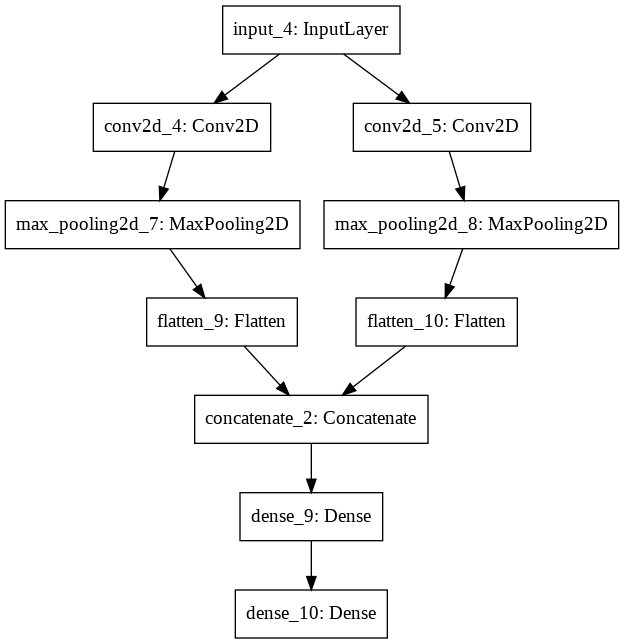

In [ ]:
hidden1 = Dense(10, activation='relu')(merge)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
plot_model(model, to_file='shared_input_layer.png')

**8. Use mnist data to train the model above, choose a numbe of epochs and give your acuracy**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 46s 25ms/step - loss: 5.3095e-07 - accuracy: 0.1159 - val_loss: 5.2969e-07 - val_accuracy: 0.1162
Epoch 2/10
1875/1875 [==============================] - 46s 24ms/step - loss: 5.3095e-07 - accuracy: 0.1159 - val_loss: 5.2969e-07 - val_accuracy: 0.1162
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 5.3095e-07 - accuracy: 0.1159 - val_loss: 5.2969e-07 - val_accuracy: 0.1162
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 5.3095e-07 - accuracy: 0.1159 - val_loss: 5.2969e-07 - val_accuracy: 0.1162
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 5.3095e-07 - accuracy: 0.1159 - val_loss: 5.2969e-07 - val_accuracy: 0.1162
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 5.3095e-07 - accuracy: 0.1159 - val_loss: 5.2969e-07 - val_accuracy: 0.1162
Epoch 7/10
1875/1875 [==============================] - 48s 25ms/step - loss

**9. Predict the y for X_test[:4] and compare to y_test[:4]**

In [ ]:
model.predict(X_test[:4])

array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

### VGG 

In [ ]:
model = VGG16()
print(model.summary())

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

**Import an image then use the VGG16 to determine what the object is**

In [ ]:
from google.colab import files
uploaded=files.upload() 

Saving dog.jpg to dog.jpg


In [ ]:
image = load_img('dog.jpg', target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

vizsla (67.26%)
